# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
lat_coords = []
lng_coords = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        lat_coords.append(lat_lng[0])
        lng_coords.append(lat_lng[1])
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&lat={lat_coords[i]}&lon={lng_coords[i]}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | prince rupert
City not found. Skipping...
Processing Record 2 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 3 of Set 1 | aripuana
City not found. Skipping...
Processing Record 4 of Set 1 | dzhetygara
Processing Record 5 of Set 1 | cabo san lucas
City not found. Skipping...
Processing Record 6 of Set 1 | ribeira grande
City not found. Skipping...
Processing Record 7 of Set 1 | qaqortoq
City not found. Skipping...
Processing Record 8 of Set 1 | aras-asan
City not found. Skipping...
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | flying fish cove
City not found. Skipping...
Processing Record 11 of Set 1 | road town
City not found. Skipping...
Processing Record 12 of Set 1 | vorgashor
City not found. Skipping...
Processing Record 13 of Set 1 | port elizabeth
City not found. Skipping...
Processing Record 14 of Set 1 | suva
Processing Recor

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          332
Lat           332
Lng           332
Max Temp      332
Humidity      332
Cloudiness    332
Wind Speed    332
Country       332
Date          332
dtype: int64

No matter how many times I ran the code above, I never got more than 350 cities.

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dzhetygara,52.3544,61.0138,-7.64,83,30,4.72,KZ,1731299065
1,thompson,63.5032,-91.0725,-17.53,95,95,5.15,CA,1731299071
2,suva,-18.9787,177.7857,25.47,81,7,9.60,FJ,1731299077
3,st. john's,49.3207,-51.5476,3.39,70,26,13.00,CA,1731299078
4,coyhaique,-46.7493,-72.2080,-4.36,97,99,3.27,CL,1731299084


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dzhetygara,52.3544,61.0138,-7.64,83,30,4.72,KZ,1731299065
1,thompson,63.5032,-91.0725,-17.53,95,95,5.15,CA,1731299071
2,suva,-18.9787,177.7857,25.47,81,7,9.60,FJ,1731299077
3,st. john's,49.3207,-51.5476,3.39,70,26,13.00,CA,1731299078
4,coyhaique,-46.7493,-72.2080,-4.36,97,99,3.27,CL,1731299084


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

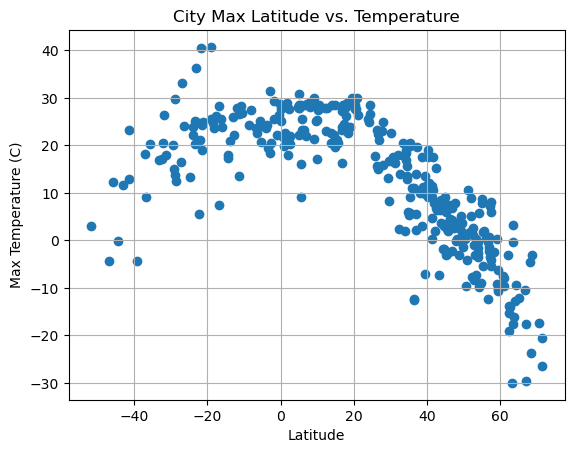

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

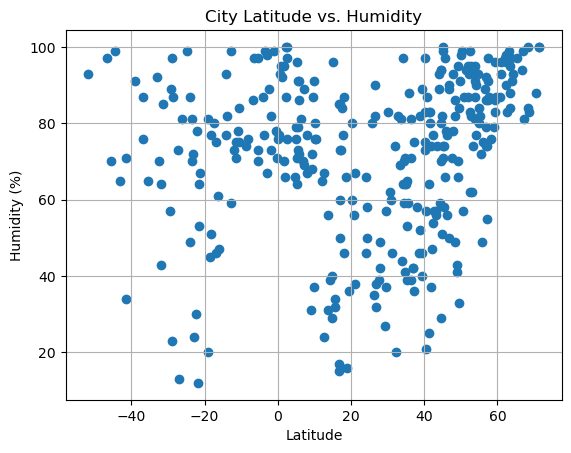

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

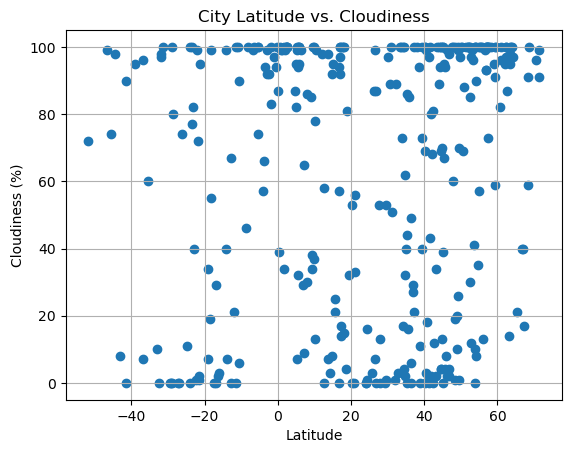

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

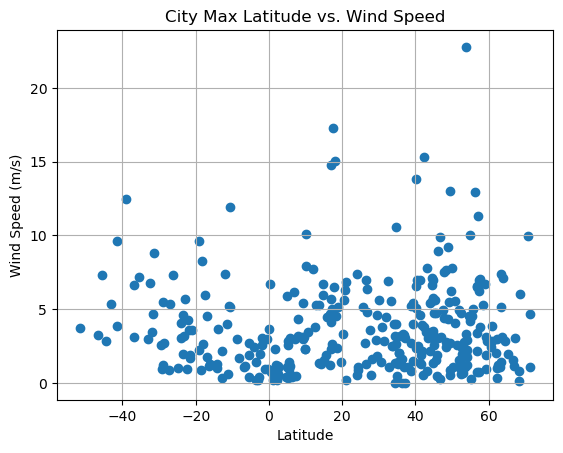

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dzhetygara,52.3544,61.0138,-7.64,83,30,4.72,KZ,1731299065
1,thompson,63.5032,-91.0725,-17.53,95,95,5.15,CA,1731299071
3,st. john's,49.3207,-51.5476,3.39,70,26,13.00,CA,1731299078
5,ilulissat,70.6301,-48.6494,-17.36,88,96,9.94,GL,1731299086
6,okha,53.8964,144.7972,-1.51,91,100,22.77,RU,1731299087


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,suva,-18.9787,177.7857,25.47,81,7,9.60,FJ,1731299077
4,coyhaique,-46.7493,-72.2080,-4.36,97,99,3.27,CL,1731299084
7,molepolole,-23.4715,25.7874,20.32,81,100,1.96,BW,1731299088
9,olavarria,-36.7799,-60.6212,9.19,87,96,3.10,AR,1731299101
15,mulanje,-16.3368,36.2836,25.63,61,2,1.15,MW,1731299123


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7721804255254292


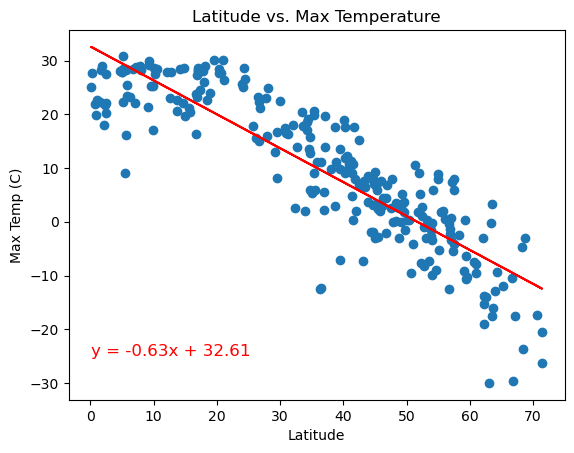

In [19]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
print(f"The r^2-value is: {rvalue**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], regress_values, 'r-')
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude");
plt.ylabel("Max Temp (C)");
plt.annotate(line_eq, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Max Temp']+5)), fontsize=12, color='red');

The r^2-value is: 0.2918149338457453


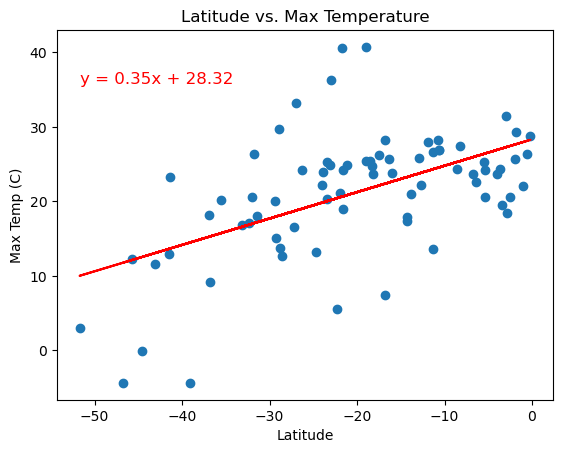

In [24]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
print(f"The r^2-value is: {rvalue**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], regress_values, 'r-')
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude");
plt.ylabel("Max Temp (C)");
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), max(southern_hemi_df['Max Temp'] - 5)), fontsize=12, color='red');

**Discussion about the linear relationship:** 
The linear regressions plotted here show the relationship between the latitude and the maximum temperature for both the norhtern hemisphere and the southern hemisphere. The data indicates that the closer you are to the equator (latitude 0), the warmer the temperature will be. There definitely is a stronger correlation in the northern hemisphere than the southern hemisphere, possibly due to the fact that it's winter the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.08579152147866581


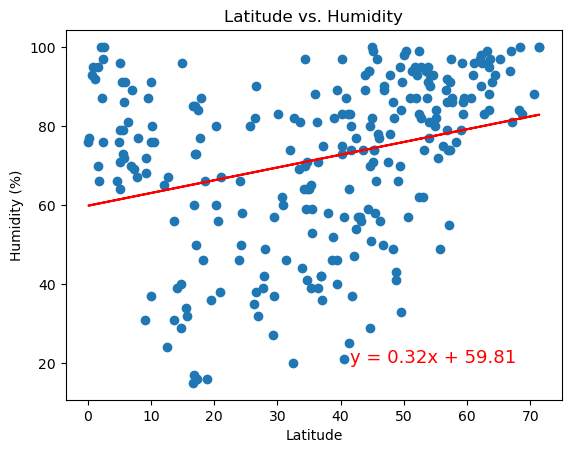

In [25]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
print(f"The r^2-value is: {rvalue**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], regress_values, 'r-')
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude");
plt.ylabel("Humidity (%)");
plt.annotate(line_eq, (max(northern_hemi_df['Lat'])-30, min(northern_hemi_df['Humidity']+5)), fontsize=13, color='red');

The r^2-value is: 0.016068540907975392


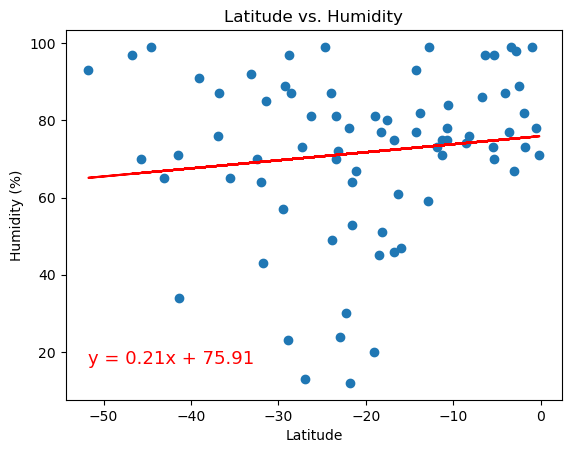

In [26]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
print(f"The r^2-value is: {rvalue**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], regress_values, 'r-')
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude");
plt.ylabel("Humidity (%)");
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Humidity']+5)), fontsize=13, color='red');

**Discussion about the linear relationship:**
These linear regression plots illustrate the relationship between latitudes and the percentage of humidity. According to this data, the further north the data is taken, the higher the humidity will be. There is a higher correlation in the northern hemisphere than the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.009753887633821809


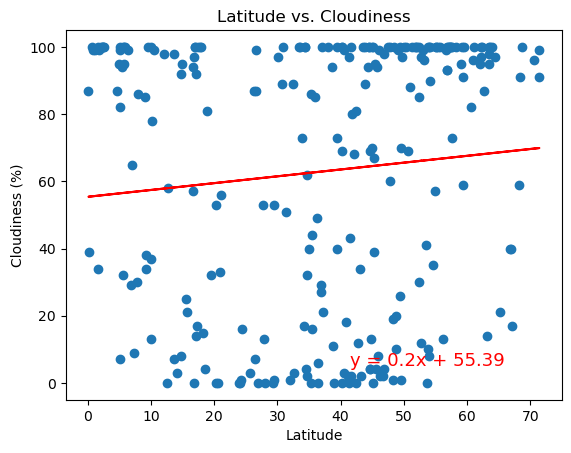

In [27]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
print(f"The r^2-value is: {rvalue**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], regress_values, 'r-')
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude");
plt.ylabel("Cloudiness (%)");
plt.annotate(line_eq, (max(northern_hemi_df['Lat'])-30, min(northern_hemi_df['Cloudiness']+5)), fontsize=13, color='red');

The r^2-value is: 0.03406360080528251


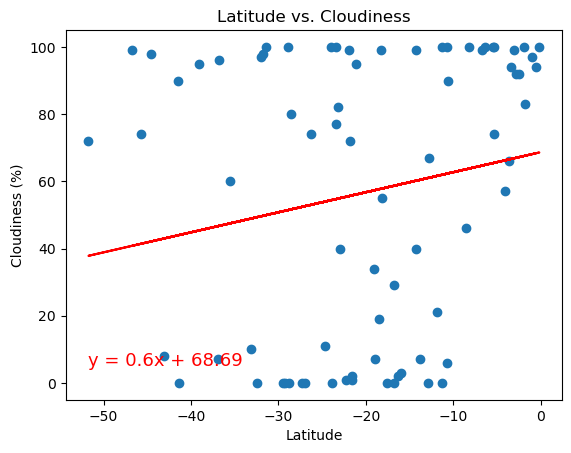

In [28]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
print(f"The r^2-value is: {rvalue**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], regress_values, 'r-')
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude");
plt.ylabel("Cloudiness (%)");
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Cloudiness']+5)), fontsize=13, color='red');

**Discussion about the linear relationship:**
These graphs show the linear regression for cloudiness at each latitude. This data seems to suggest that there is slightly more cloud-coverage up north, although the correlation with the northern hemisphere is weaker.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.006358983531211371


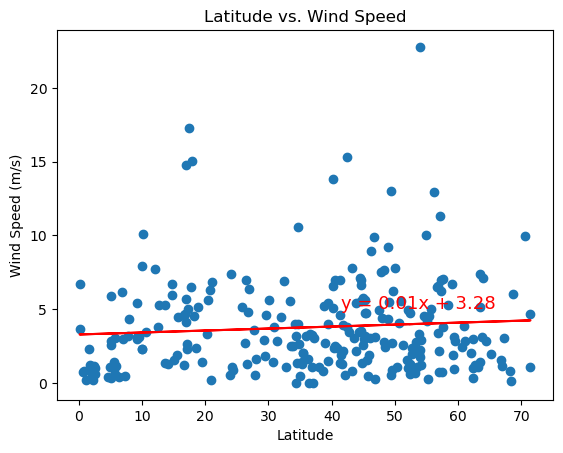

In [29]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
print(f"The r^2-value is: {rvalue**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], regress_values, 'r-')
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude");
plt.ylabel("Wind Speed (m/s)");
plt.annotate(line_eq, (max(northern_hemi_df['Lat'])-30, min(northern_hemi_df['Wind Speed']+5)), fontsize=13, color='red');

The r^2-value is: 0.17143212683206452


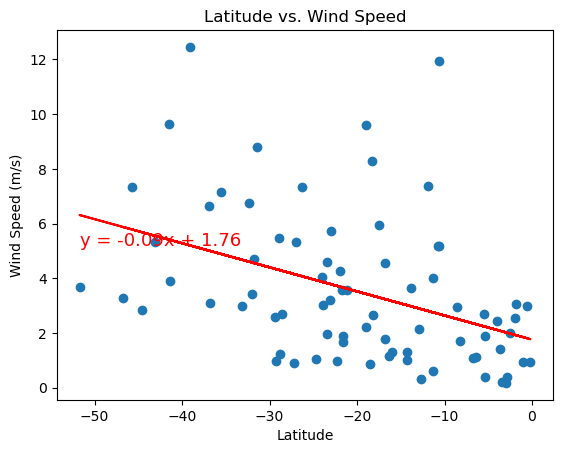

In [30]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
print(f"The r^2-value is: {rvalue**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], regress_values, 'r-')
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude");
plt.ylabel("Wind Speed (m/s)");
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Wind Speed']+5)), fontsize=13, color='red');

**Discussion about the linear relationship:**
This illustrates the correlation of wind speed at each latitude. This seems to have a weak correlation overall, but the southern hemisphere has a stronger correlation. But above the equator, it is probably safe to assume that there is almost no correlation with latitude and wind speed.